# MiBiPreT example: Ordination with Amersfoort data

Diagnostic plots for data analysis on microbial biodegredation at the contaminant Amersfoort site. Author: Alraune Zech

Data based on the PhD thesis of *Johan van Leeuwen*, 2021 'Biodegredation of mono- and polyaromatic hydrocarbons in a contaminated aquifer originating from a former Pintsch gas factory site' which is equivalent to the manuscript of van Leeuwen et al., 2022 'Anaerobic degradation of benzene and other aromatic hydrocarbons in a tar-derived plume: Nitrate versus iron reducing conditions', J. of Cont. Hydrol. The data was provided by Johan van Leeuwen.
  
## Background: Amersfoort contaminant site

Text to be added.

**Required packages**

In [1]:
from mibipret.data.load_data import load_excel
from mibipret.data.check_data import standardize, standard_names
from mibipret.data.set_data import merge_data, extract_data

#from mibipret.analysis.reduction.transformation import filter_values,transform_values
from mibipret.analysis.reduction.ordination import pca,cca,rda
from mibipret.visualize.ordination_plot import ordination_plot

import sys
path = '/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/analysis/reduction'
sys.path.append(path) # append the path to module
from transformation import filter_values,transform_values

path = '/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/data'
sys.path.append(path) # append the path to module
from set_data import merge_data, extract_data


## Analysis

### Data loading

In [2]:
file_path = './amersfoort.xlsx'

Load and standardize data of environmental quantities/chemicals

In [3]:
environment_raw,units = load_excel(file_path,
                                    sheet_name = 'environment',
                                    verbose = False)

environment,units = standardize(environment_raw,
                                reduce = True,
                                verbose=False)

#display(environment)

________________________________________________________________
________________________________________________________________
________________________________________________________________


Load and standardize data of contaminants:

In [4]:
contaminants_raw,units = load_excel(file_path,
                                    sheet_name = 'contaminants',
                                    verbose = False)

contaminants,units = standardize(contaminants_raw,
                                  reduce = False,
                                  verbose = False)
#display(contaminants)

________________________________________________________________
________________________________________________________________
________________________________________________________________


Merge both data frames into one for further analysis:

In [5]:
data = merge_data([environment,contaminants],clean = True)
#display(data)

### Data pre-processing

Specification of variables to chose for ordination. We make sure that variables selected for analysis are in standard names.

In [6]:
variables_1 = standard_names(['Sum GC'])
variables_2 = standard_names(['nitrate','pH','nitrite','sulfate','Redox','EC','DOC',"Mn","Fe"])

Extracting data of interest from data frame. All other quantities are removed, since only columns of interest should be passed to ordination analysis routines. 

In [7]:
data_null = extract_data(data,
             name_list = variables_1 + variables_2,
             keep_setting_data = True,
             inplace = True)

Cleaning data, i.e. remove all sites where measurements are missing for any of the quantities

In [8]:
filter_values(data_null, 
              replace_NaN = 'remove', 
              inplace = True,
              verbose = True)


Perform filtering of values since ordination requires all values to be numeric.
The sample row(s) have been removed since they contain NaN values: [19]


/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/analysis/reduction/transformation.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(NaN_rows, inplace = True)


,depth,obs_well,sample_nr,manganese,iron2,EC,DOC,nitrite,sulfate,pH,nitrate,redoxpot,Sum GC
0,15-16,1024,1024(16),0.01,0.03,563,1.5,0.51,6,6.4,102,78,9
1,21-22,1033,1033(22),0.34,11.00,500,2.4,0.13,0,7.1,39,-145,9
2,15-16,241,241(16),0.13,1.10,401,4.5,0.20,7,5.7,54,102,29
3,20-21,241,241(21),0.19,14.50,366,4.8,1.08,0,6.3,180,-32,14985
4,29-30,241,241(30),0.93,6.40,310,6.5,0.36,0,6.2,84,-20,10375
5,35-36,241,241(36),0.05,0.11,351,5.5,0.90,31,5.5,158,150,8
6,20-21,320,320(21),0.42,4.30,834,3.6,1.14,40,7.3,181,-131,13
7,20-21,323,323(21),0.28,1.30,539,1.4,0.28,12,7.0,68,-86,8
8,8-9,323,323(9),0.13,0.04,322,6.1,0.58,35,5.6,122,152,9
9,8-9,352,352(9),0.16,0.04,229,3.5,1.09,24,5.3,123,180,3697


### Data transformation

Concentrations of contaminants (`Sum GC`) is log-transformed (given that concentration vary over orders of magnitude) and then standardized.
Other data is only standardized.

In [9]:
transform_values(data_null,
                 name_list = variables_1,
                 how = 'log_scale',
                 inplace = True,
                 )

transform_values(data_null,
                  name_list = variables_1,
                  how = 'standardize',
                  inplace = True,
                  )

transform_values(data_null,
                  name_list = variables_2,
                  how = 'standardize',
                  inplace = True,
                )


/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/analysis/reduction/transformation.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[quantity] = np.log10(log_scale_A * data[quantity] + log_scale_B)
/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/analysis/reduction/transformation.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[quantity] = zscore(data[quantity].values)


,depth,obs_well,sample_nr,manganese,iron2,EC,DOC,nitrite,sulfate,pH,nitrate,redoxpot,Sum GC
0,15-16,1024,1024(16),-0.436852,-0.893917,1.390889,-0.683686,0.587911,-0.206364,0.450269,0.763911,0.555275,-1.583575
1,21-22,1033,1033(22),-0.308922,1.862104,0.994335,-0.583226,-0.460329,-0.749129,1.726979,-0.304822,-1.664580,-1.583575
2,15-16,241,241(16),-0.390332,-0.625098,0.371179,-0.348819,-0.267232,-0.115903,-0.826442,-0.050362,0.794183,-1.253701
3,20-21,241,241(21),-0.367072,2.741417,0.150871,-0.315333,2.160271,-0.749129,0.267881,2.087103,-0.539721,0.612042
4,29-30,241,241(30),-0.080199,0.706434,-0.201621,-0.125575,0.174132,-0.749129,0.085494,0.458558,-0.420267,0.501658
5,35-36,241,241(36),-0.421346,-0.873818,0.056454,-0.237197,1.663736,2.055157,-1.191217,1.713895,1.271999,-1.615211
6,20-21,320,320(21),-0.277909,0.178846,3.096699,-0.449279,2.325783,2.869305,2.091754,2.104067,-1.525217,-1.482545
7,20-21,323,323(21),-0.332182,-0.574851,1.239821,-0.694848,-0.046550,0.336401,1.544592,0.187134,-1.077264,-1.615211
8,8-9,323,323(9),-0.390332,-0.891404,-0.126087,-0.170224,0.781008,2.417000,-1.008830,1.103191,1.291909,-1.583575
9,8-9,352,352(9),-0.378702,-0.891404,-0.711476,-0.460441,2.187856,1.421931,-1.555991,1.120155,1.570635,0.191875


### Ordination analysis by PCA

In [10]:
ordination_output = pca(data_null,
                        independent_variables = variables_1+variables_2,
                        verbose = True)

 Running function 'pca()' on data
Information about the success of the PCA:
----------------------------------------------------------------
Principle component 0 explains 32.15% of the total variance.
Principle component 1 explains 24.3% of the total variance.
Principle component 2 explains 14.18% of the total variance.
Principle component 3 explains 10.19% of the total variance.
Principle component 4 explains 7.79% of the total variance.
Principle component 5 explains 4.74% of the total variance.
Principle component 6 explains 3.44% of the total variance.
Principle component 7 explains 2.33% of the total variance.
Principle component 8 explains 0.6% of the total variance.
Principle component 9 explains 0.28% of the total variance.

The correlation coefficient between PC1 and PC2 is -1.7023282794263142e-16.
----------------------------------------------------------------


### Ordination analysis by CCA

In [11]:
# ordination_output = cca(data_null,
#                         independent_variables = variables_1,
#                         dependent_variables = variables_2,
#                   )

### Ordination analysis by RDA

In [12]:
# ordination_output = rda(data_null,
#                         independent_variables = environment,
#                         dependent_variables = species,
#                   )

### Ordination plot

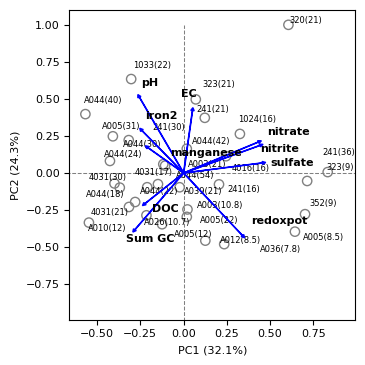

In [13]:
fig, ax = ordination_plot(ordination_output=ordination_output,
                plot_scores = True, 
                plot_loadings = True,
                rescale_loadings_scores = True, 
                # plot_scores = False, 
                # axis_ranges = [-0.6,0.8,-0.8,1.0],
                # save_fig = 'ordination_amersfoort.png',
                )